In [1]:
import pandapower as pp
import pandapower.networks as nw
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
net=nw.example_simple()
print(net)

This pandapower network includes the following parameter tables:
   - bus (7 elements)
   - load (1 element)
   - sgen (1 element)
   - gen (1 element)
   - switch (8 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (4 elements)
   - trafo (1 element)


In [4]:
df1= pd.read_excel('LD_Net.xlsx')
df2=pd.read_excel('PV1_refine1_excel.xlsx')

     LoadDay  MW01  MW02  MW03  MW04  MW05  MW06  MW07  MW08  MW09  ...  MW15  \
0 1988-01-01  6081  5771  5598  5543  5453  5418  5233  5353  5537  ...  5288   
1 1988-01-02  5213  4929  4728  4723  4768  4962  5037  5546  6117  ...  6060   
2 1988-01-03  5831  5548  5369  5319  5340  5459  5488  5904  6438  ...  6503   
3 1988-01-04  5969  5625  5606  5622  5679  5886  6263  7052  8389  ...  9099   
4 1988-01-05  7089  6899  6888  6866  6914  7096  7386  8049  9207  ...  9455   

   MW16  MW17  MW18  MW19  MW20  MW21  MW22  MW23  MW24  
0  5317  5535  6143  6242  6019  5854  5711  5728  5506  
1  6031  6106  6750  7075  6765  6506  6348  6456  6136  
2  6462  6576  7272  7581  7413  7197  7042  6813  6548  
3  9005  9160  9565  9610  9034  8565  8299  8314  7844  
4  9352  9490  9942  9941  9407  8917  8612  8505  7973  

[5 rows x 25 columns]


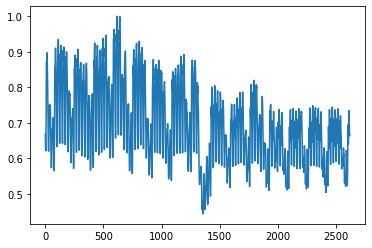

In [5]:
print(df1.head())
RawNetData=df1.iloc[:11630, :]
Net_data=RawNetData.iloc[-115:-6, 1:].values
Net_data=Net_data.flatten()
Max_load=Net_data.max()
Net_data=Net_data/Max_load
plt.plot(Net_data)
plt.show()

   Unnamed: 0  0:AM  1:AM  2:AM  3:AM  4:AM  5:AM  6:AM  7:AM    8:AM  ...  \
0           0     0     0     0     0     0   0.0   0.0   0.0  28.224  ...   
1           1     0     0     0     0     0   0.0   0.0   0.0  16.416  ...   
2           2     0     0     0     0     0   0.0   0.0   0.0  29.664  ...   
3           3     0     0     0     0     0   0.0   0.0   0.0  23.808  ...   
4           4     0     0     0     0     0   0.0   0.0   0.0  28.992  ...   

      4:PM    5:PM  6:PM  7:PM  8:PM  9:PM  10:PM  11:PM       SUM  \
0   36.960   2.880   0.0   0.0     0     0      0      0  3832.128   
1   55.776   3.168   0.0   0.0     0     0      0      0  2769.504   
2   67.296  12.384   0.0   0.0     0     0      0      0  3750.624   
3   55.296   6.432   0.0   0.0     0     0      0      0  3367.008   
4  111.648   8.352   0.0   0.0     0     0      0      0  1966.368   

   Day development \ time  
0                3.856812  
1                2.787343  
2                3.774783 

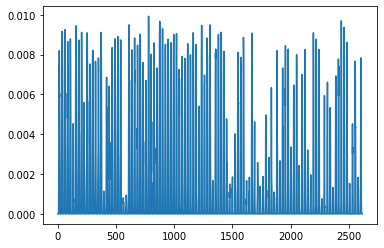

In [6]:
print(df2.head())
PV_input1=df2.iloc[250:359, 1:25].values
PV_data=PV_input1.flatten()
PV_data=PV_data/Max_load
plt.plot(PV_data)
plt.show()


In [7]:
from pandapower.control.controller.const_control import ConstControl
from pandapower.timeseries.data_sources.frame_data import DFData

In [8]:
Combined_Sources=np.column_stack((Net_data[:95], PV_data[:95]))
df=pd.DataFrame(Combined_Sources, columns=["Net_data", "PV_data"])
print(df.head())
ds=DFData(df)
df.describe()

   Net_data  PV_data
0  0.668459      0.0
1  0.644073      0.0
2  0.630197      0.0
3  0.621606      0.0
4  0.620739      0.0


,Net_data,PV_data
count,95.000000,95.000000
mean,0.721493,0.002476
std,0.100844,0.003301
min,0.565191,0.000000
25%,0.635938,0.000000
50%,0.699956,0.000099
75%,0.810578,0.004917
max,0.910457,0.009251


In [9]:
ConstControl(net, "sgen", "p_mw", element_index=net.sgen.index, profile_name=["PV_data"], data_source=ds)
ConstControl(net, "load", "p_mw", element_index=net.load.index, profile_name=["Net_data"], data_source=ds)

This ConstControl has the following parameters: 

index:             1
json_excludes:     ['self', '__class__']

In [10]:
print(net.controller)

                     object  in_service  order level  initial_run  \
0  ConstControl [sgen.p_mw]        True   -1.0    -1        False   
1  ConstControl [load.p_mw]        True   -1.0    -1        False   

                                          recycle  
0  {'trafo': False, 'gen': False, 'bus_pq': True}  
1  {'trafo': False, 'gen': False, 'bus_pq': True}  


In [11]:
from pandapower.timeseries.run_time_series import run_timeseries

In [12]:
run_timeseries(net, time_steps=(0, 94))

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


In [13]:
from pandapower.timeseries.output_writer import OutputWriter

In [14]:
time_step=np.arange(0, 95, 1)
print(time_step)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]


In [15]:
ow=OutputWriter(net, time_steps=time_step, output_path="./results/", output_file_type=".xlsx")
ow.log_variable("res_bus", "vm_pu")
ow.log_variable("res_line", "loading_percent")
run_timeseries(net, time_steps=time_step)

100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 352.68it/s]


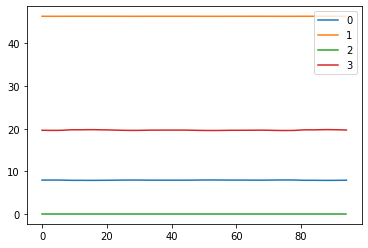

In [16]:
df = pd.read_excel("./results/res_line/loading_percent.xlsx", index_col=0)


In [18]:
L1_LoadingPercant=df.iloc[:, 0]
L2_LoadingPercant=df.iloc[:, 1]
L3_LoadingPercant=df.iloc[:, 2]
L4_LoadingPercant=df.iloc[:, 3]

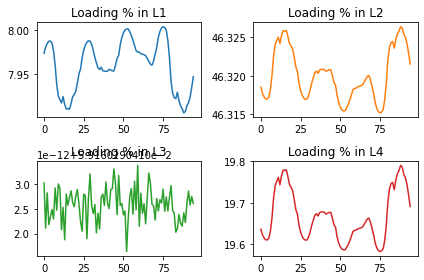

In [24]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(time_step, L1_LoadingPercant)
axs[0, 0].set_title('Loading % in L1')
axs[0, 1].plot(time_step, L2_LoadingPercant, 'tab:orange')
axs[0, 1].set_title('Loading % in L2')
axs[1, 0].plot(time_step, L3_LoadingPercant, 'tab:green')
axs[1, 0].set_title('Loading % in L3')
axs[1, 1].plot(time_step, L4_LoadingPercant, 'tab:red')
axs[1, 1].set_title('Loading % in L4')
fig.tight_layout()